# Introduction to Regression with Neural Networks in Tensorflow

There  are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a  number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

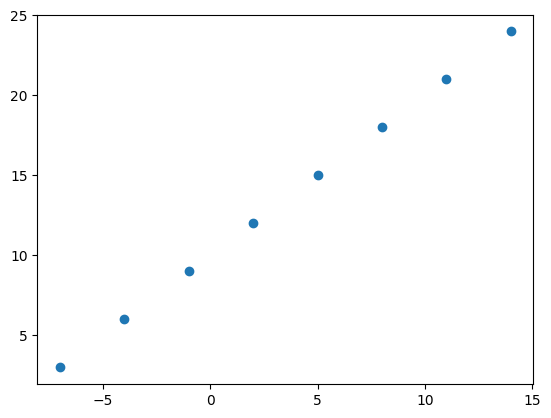

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a  demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [9]:
# turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

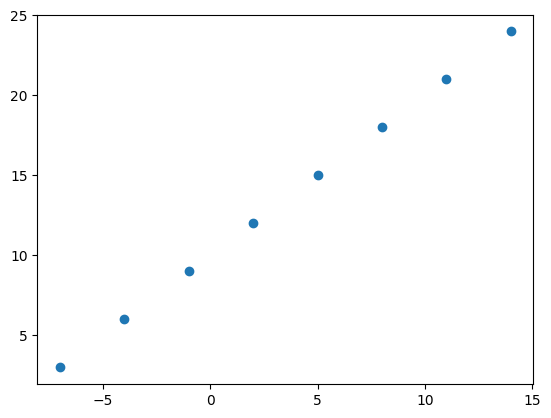

In [11]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learnign model.
2. **Compiling a  model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.5097 - mae: 14.5097
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 14.3772 - mae: 14.3772
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 14.2447 - mae: 14.2447
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 14.1122 - mae: 14.1122
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 13.9797 - mae: 13.9797
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 13.8472 - mae: 13.8472
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 13.7147 - mae: 13.7147
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 13.5822 - mae: 13.5822
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - loss: 13.4497 - mae: 13.4497
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 13.3172 - mae: 13.3172


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[1.1456728]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation fucntion of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** o fthe optimization funciton.
3. **Fiting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

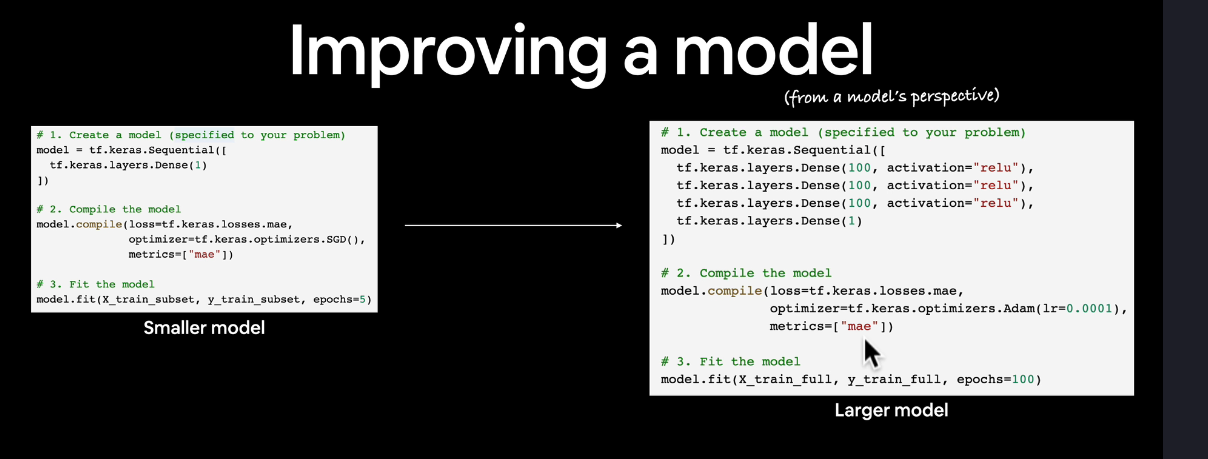

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - loss: 8.2927 - mae: 8.2927
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 8.1602 - mae: 8.1602
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 8.0277 - mae: 8.0277
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 7.8952 - mae: 7.8952
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 7.7627 - mae: 7.7627
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.6302 - mae: 7.6302
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.4977 - mae: 7.4977
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.4475 - mae: 7.4475
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.4419 - mae: 7.4419
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.4362 - mae: 7.4362
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.4306 - mae: 7.4306
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.4250 - mae: 7.4250
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58m

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[30.225225]], dtype=float32)

In [18]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - loss: 13.0356 - mae: 13.0356
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.5187 - mae: 12.5187
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.0081 - mae: 12.0081
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.4885 - mae: 11.4885
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.9655 - mae: 10.9655
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.4225 - mae: 10.4225
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.8494 - mae: 9.8494
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.2485 - mae: 9.2485
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.6133 - mae: 8.6133
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.9391 - mae: 7.9391
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.2193 - mae: 7.2193
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.4434 - mae: 6.4434
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [19]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#Let's try to make a prediction
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[31.64243]], dtype=float32)

**Common ways to improve a deep model:**

* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimizaiton function
* Change the learning rate (potentially the most important hyperparameter)
* Fitting on more data
* Fitting for longer (epochs)




In [21]:
# Change neuron numbers

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - loss: 13.4058 - mae: 13.4058
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.8768 - mae: 12.8768
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.3473 - mae: 12.3473
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.8123 - mae: 11.8123
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.2669 - mae: 11.2669
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.7062 - mae: 10.7062
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.1250 - mae: 10.1250
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.5181 - mae: 9.5181
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.9175 - mae: 8.9175
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.2994 - mae: 8.2994
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.6389 - mae: 7.6389
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.9295 - mae: 6.9295
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [22]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[31.48709]], dtype=float32)

In [23]:
# Change the activiation function

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - loss: 13.3896 - mae: 13.3896
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.9080 - mae: 12.9080
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.4246 - mae: 12.4246
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.9368 - mae: 11.9368
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.4421 - mae: 11.4421
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.9381 - mae: 10.9381
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.4220 - mae: 10.4220
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.8914 - mae: 9.8914
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.3433 - mae: 9.3433
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.7751 - mae: 8.7751
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.1837 - mae: 8.1837
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.5663 - mae: 7.5663
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [24]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[31.81687]], dtype=float32)

In [25]:
# Change the optimization function

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.0730 - mae: 14.0730
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.0095 - mae: 14.0095
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 13.9460 - mae: 13.9460
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.8824 - mae: 13.8824
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.8188 - mae: 13.8188
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.7551 - mae: 13.7551
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.6914 - mae: 13.6914
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13.6277 - mae: 13.6277
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.5639 - mae: 13.5639
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.5000 - mae: 13.5000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.4362 - mae: 13.4362
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.3722 - mae: 13.3722
Epoch 13/100
1/1 ━━━━━━━━━

In [26]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[30.059343]], dtype=float32)

In [27]:
# Change the learning rate

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - loss: 13.5280 - mae: 13.5280
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.7904 - mae: 12.7904
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.0527 - mae: 12.0527
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.3121 - mae: 11.3121
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5661 - mae: 10.5661
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.8131 - mae: 9.8131
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.0510 - mae: 9.0510
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.2781 - mae: 8.2781
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.4928 - mae: 7.4928
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.7940 - mae: 6.7940
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.8184 - mae: 6.8184
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.1126 - mae: 7.1126
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [28]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[25.62334]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaulate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...

```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does a model perform while it learns?
* The predictions of the model - How do the predictions of a model line up  against the ground truth (the original labels)?

In [29]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [30]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

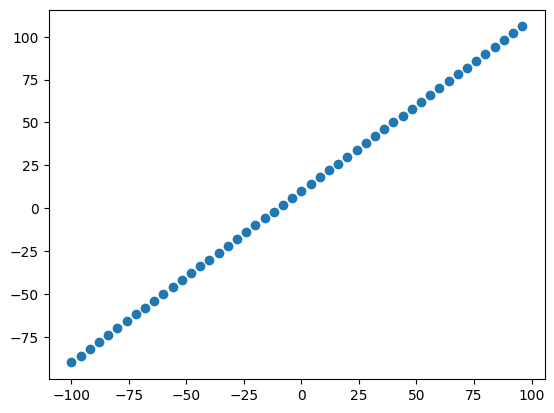

In [31]:
# Visualize the data
import matplotlib.pyplot as plt
# plt.plot(X, y)
plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typicaly 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available.

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

In [32]:
# Check the length of how many samples we have
len(X)

50

In [33]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are taining samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

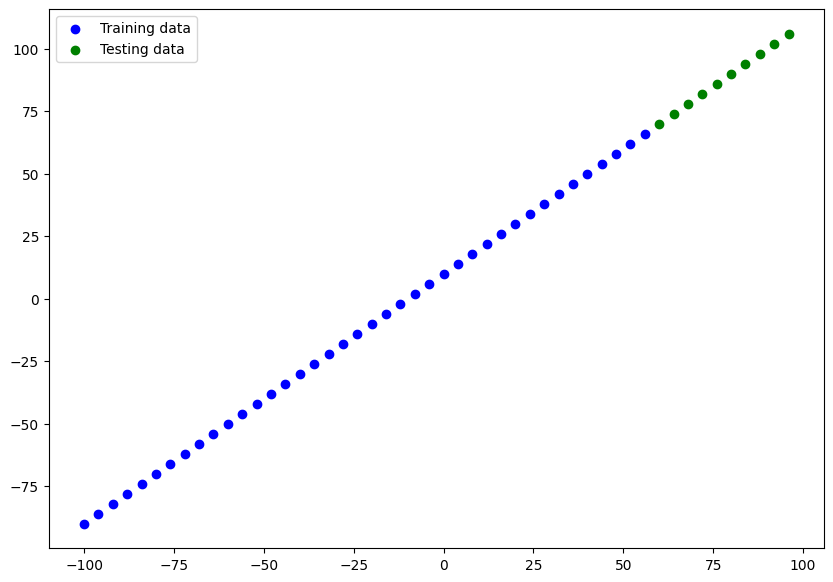

In [34]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in greem
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [35]:
# Let's have a look a at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [36]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Let's create a model which build automatically by definin gthe input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [50]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [51]:
tf.expand_dims(X_train, axis=-1)

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [ ]:
# Get a summary of our model
model.summary()

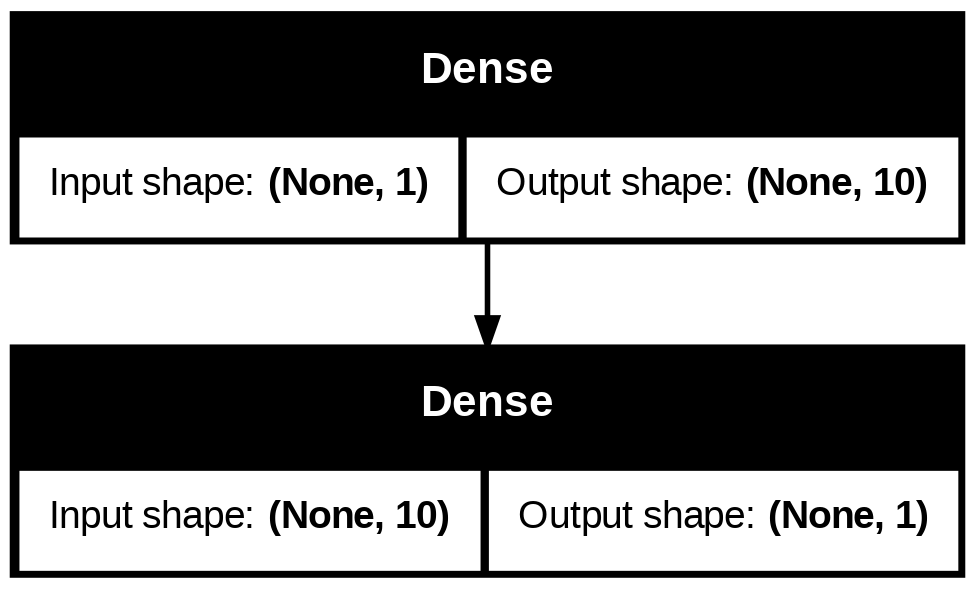

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth lables.

Often you'll see this in the form of 'y_test' or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [54]:
# Make some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[33.861504],
       [36.01668 ],
       [38.17186 ],
       [40.327038],
       [42.482212],
       [44.63739 ],
       [46.79257 ],
       [48.947742],
       [51.102924],
       [53.2581  ]], dtype=float32)

In [55]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note** If you feel like you're goind to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [56]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data, and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predicitons in red
  plt.scatter(test_data, predictions, c="r", label="Predicitons")
  # Show the legend
  plt.legend();

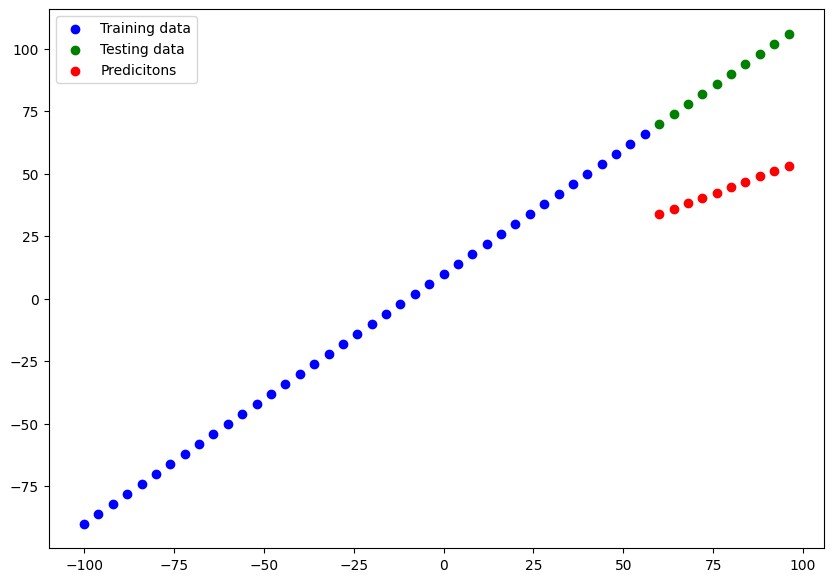

In [57]:
# plot_predictions()
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predicitons with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on avarage, how wrong is each of my model's predicitons"
* MSE - mean square error, "square the average error"

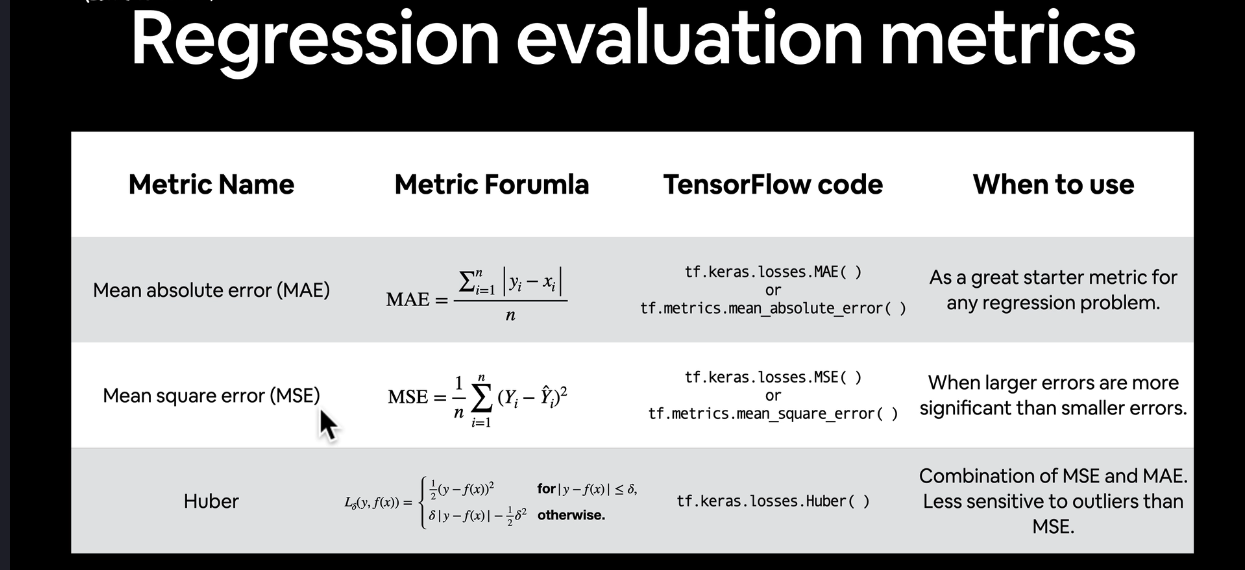

In [58]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 44.4402 - mae: 44.4402


[44.4401969909668, 44.4401969909668]

In [59]:
# Calculate the mean absolute error
# mae = sum(abs(y_pred.reshape(-1) - y_test)) / len(y_test);
# mae
#mae = sum(abs(y_pred.squeeze() - y_test)) / len(y_test);
#mae
tf.keras.metrics.mae(y_true = y_test,
                     y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=44.4401969909668>

In [60]:
# Calculate the mean square error
#mae = sum((tf.squeeze(y_pred) - y_test) ** 2) / len(y_test);
#mae
tf.keras.metrics.mse(y_true = y_test,
                     y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=2003.009033203125>

In [61]:
# Make some functions t o reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_true,
                              y_pred=tf.squeeze(y_pred));

def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_true,
                              y_pred=tf.squeeze(y_pred));


In [62]:
y_pred

array([[33.861504],
       [36.01668 ],
       [38.17186 ],
       [40.327038],
       [42.482212],
       [44.63739 ],
       [46.79257 ],
       [48.947742],
       [51.102924],
       [53.2581  ]], dtype=float32)

In [63]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### Running experiments to improve our model

'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
'''

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger *using  a more complex model) - this might come in the form of more layers or more hidden units each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1'**

In [67]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3 . Fit the model
model_1.fit(tf.reshape(X_train, shape=(-1, 1)), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 99.4312 - mae: 99.4312   
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.2630 - mae: 64.2630
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.5083 - mae: 29.5083
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6056 - mae: 9.6056
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.1879 - mae: 11.1879
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8126 - mae: 7.8126
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.6735 - mae: 11.6735
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6277 - mae: 8.6277
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0965 - mae: 10.0965
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.8191 - mae: 11.8191
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.7375 - mae: 8.7375
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.2062 - mae: 10.2062
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


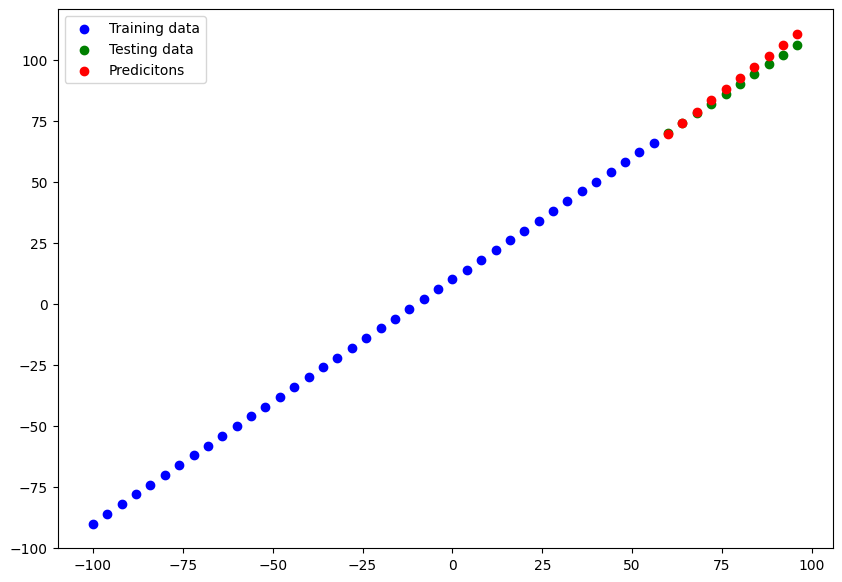

In [68]:
# Make and plot predicitons for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [69]:
# Calculate model_1 evalulation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.158527374267578>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.815849304199219>)

**Build `model_2`**

In [72]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.reshape(X_train, shape=(-1, 1)), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 25.2701 - mse: 876.4047 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.8279 - mse: 770.8277
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.1446 - mse: 547.5953
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.3410 - mse: 453.1405
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2171 - mse: 235.4400
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.0126 - mse: 315.9546
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.6452 - mse: 333.1898
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.5874 - mse: 213.9542
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.4127 - mse: 288.0637
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.0161 - mse: 192.6135
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.8446 - mse: 303.7509
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.9551 - mse: 190.7377
Epoch 13/100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


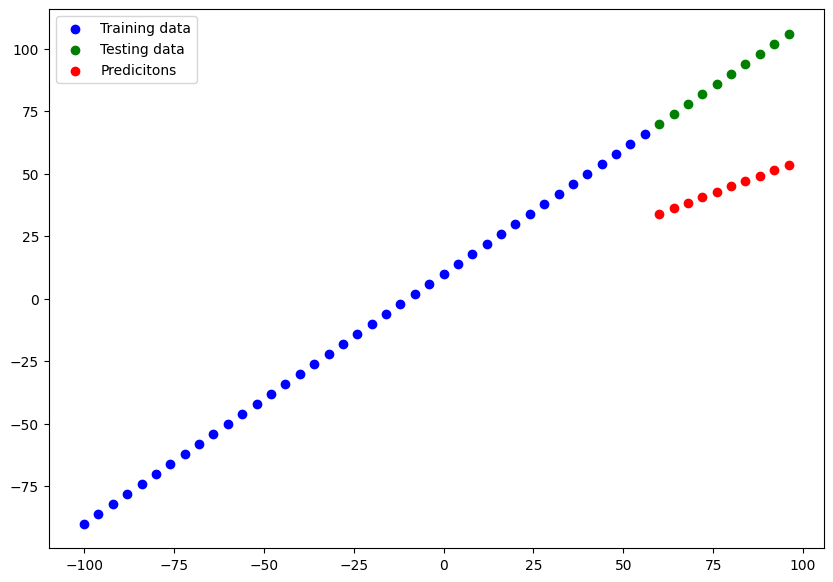

In [73]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [75]:
# Calculate model_2 evalulation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.1616325378418>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1977.94921875>)

**Build 'model_3'**

In [85]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 38.9503 - mae: 38.9503 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.7834 - mae: 20.7834
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 21.1613 - mae: 21.1613
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.2115 - mae: 13.2115
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.4649 - mae: 18.4649
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.9774 - mae: 12.9774
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.9695 - mae: 14.9695
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.7458 - mae: 15.7458
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.7840 - mae: 11.7840
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.7495 - mae: 14.7495
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.7901 - mae: 15.7901
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.0138 - mae: 12.0138
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


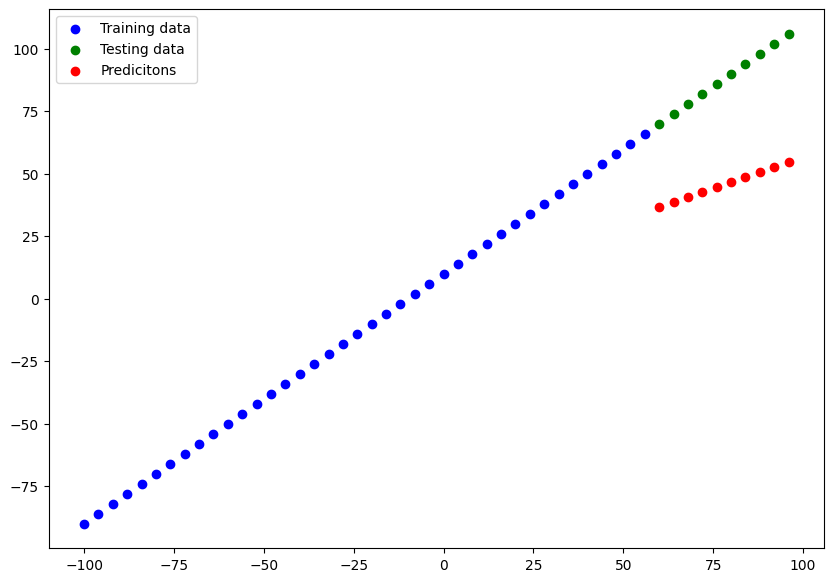

In [89]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [90]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=42.339134216308594>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1824.6396484375>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results